<a href="https://colab.research.google.com/github/Atharva2328/Q2-Datasets/blob/main/Atharva_C_Final_Q1_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Q1: CNN - Object Detection
import os
import zipfile
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [2]:
# Define paths
url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_path = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url, extract=False) # extract=False here

# Extract manually
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(os.path.dirname(zip_path))

# Update base directory
base_dir = os.path.join(os.path.dirname(zip_path), 'cats_and_dogs_filtered')

# Create training and validation directories
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Check if directories exist and print paths
print("Training directory:", train_dir)
print("Validation directory:", validation_dir)
print("Training directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(validation_dir))

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training directory: /root/.keras/datasets/cats_and_dogs_filtered/train
Validation directory: /root/.keras/datasets/cats_and_dogs_filtered/validation
Training directory exists: True
Validation directory exists: True


In [3]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        brightness_range=[0.8, 1.2],  # Adjust brightness
        channel_shift_range=20  # Randomly shift color channels
    )

val_gen = ImageDataGenerator(rescale=1./255)

# Removed validation_split from train_datagen.flow_from_directory()
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
# Instead of using validation_split in train_datagen.flow_from_directory,
# we now use val_gen.flow_from_directory with the validation_dir.
val_data = val_gen.flow_from_directory(
    validation_dir,  # Now using validation_dir
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid') # Added a Dense layer with sigmoid activation
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, epochs=20, validation_data=val_data)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 189ms/step - accuracy: 0.5272 - loss: 0.7012 - val_accuracy: 0.5000 - val_loss: 0.6911
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 171ms/step - accuracy: 0.5281 - loss: 0.6899 - val_accuracy: 0.5000 - val_loss: 0.6849
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.5240 - loss: 0.6868 - val_accuracy: 0.5580 - val_loss: 0.6895
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 170ms/step - accuracy: 0.5062 - loss: 0.6876 - val_accuracy: 0.5030 - val_loss: 0.6918
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.5031 - loss: 0.6915 - val_accuracy: 0.5000 - val_loss: 0.6861
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.5082 - loss: 0.6919 - val_accuracy: 0.5570 - val_loss: 0.6860
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 167ms/step - accuracy: 0.5317 - loss: 0.6890 - val_accuracy: 0.5480 - val_loss: 0.6812
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - accuracy: 0.5549 - loss: 0

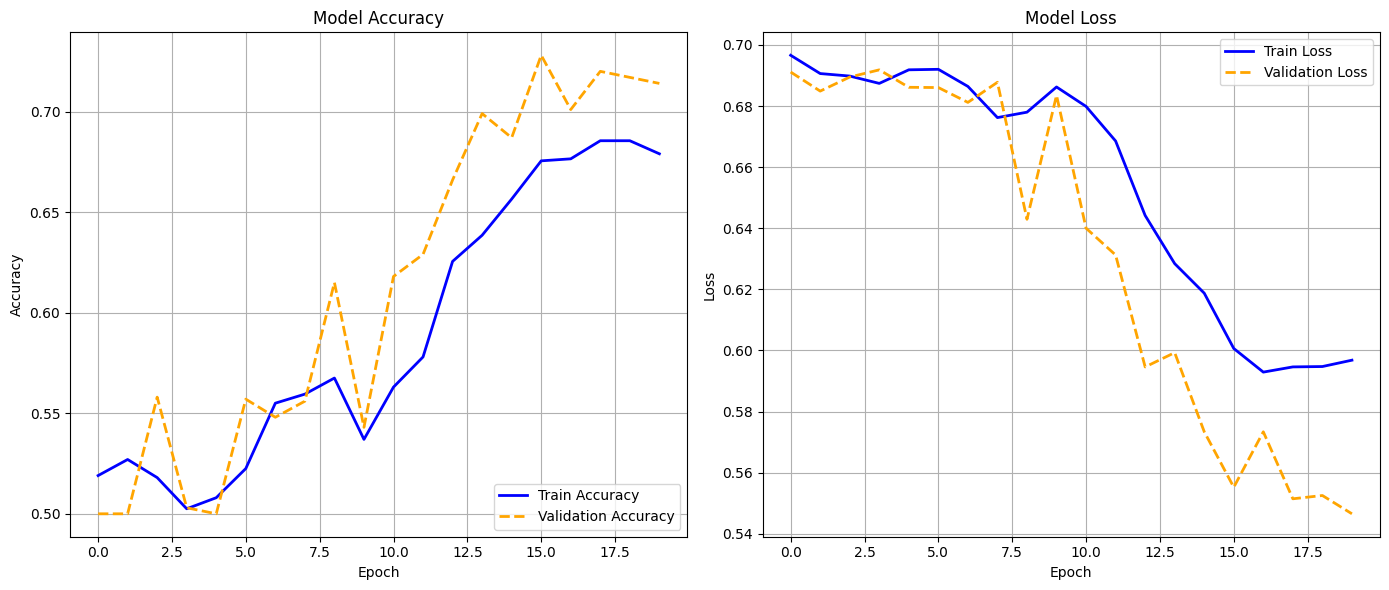

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', linestyle='-', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='--', linewidth=2)
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='blue', linestyle='-', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='--', linewidth=2)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Optionally, save the plot to a file
plt.savefig('model_performance_plot.png', dpi=300)  # Saves the plot as a high-res PNG file


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


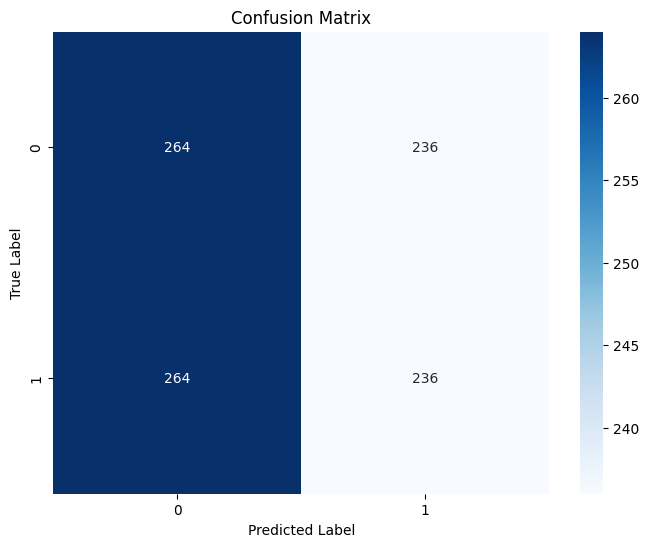

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Assuming you have true labels and predictions
y_pred = model.predict(val_data)
y_pred_classes = np.round(y_pred)
y_true = val_data.classes

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


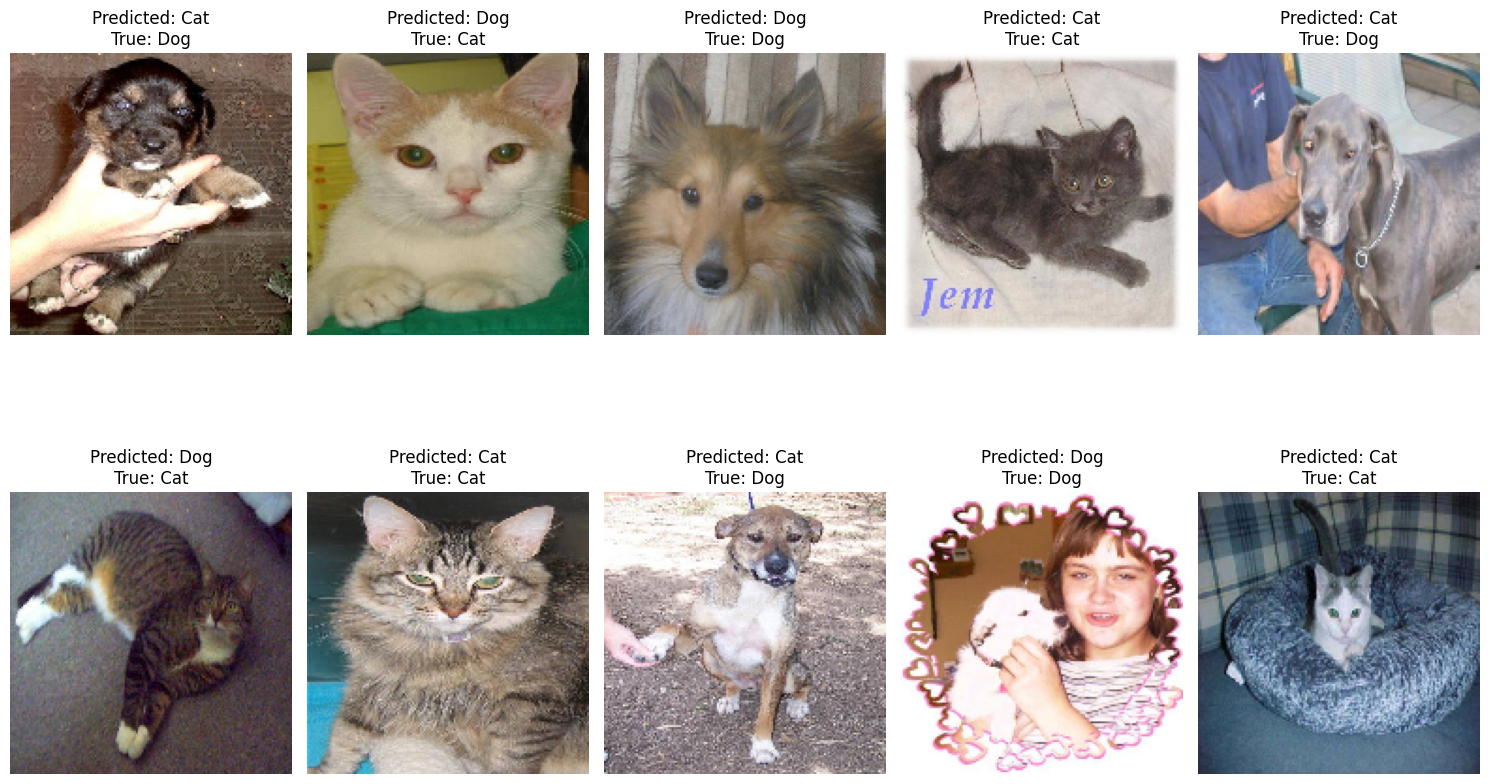

In [7]:
import numpy as np

# Get a batch of images and labels from the validation set
val_images, val_labels = next(val_data)

# Predict the labels for the images
predictions = model.predict(val_images)
predicted_labels = (predictions > 0.5).astype(int).flatten()

# Define class names
class_names = ['Cat', 'Dog']

# Plot the images with their predicted and true labels
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(val_images[i])
    plt.title(f"Predicted: {class_names[predicted_labels[i]]}\nTrue: {class_names[int(val_labels[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [8]:
# Save the model
model.save('cats_and_dogs_classifier.h5')


In [9]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('cats_and_dogs_classifier.h5')

# Use the loaded model to make predictions
# predictions = loaded_model.predict(new_data)


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step


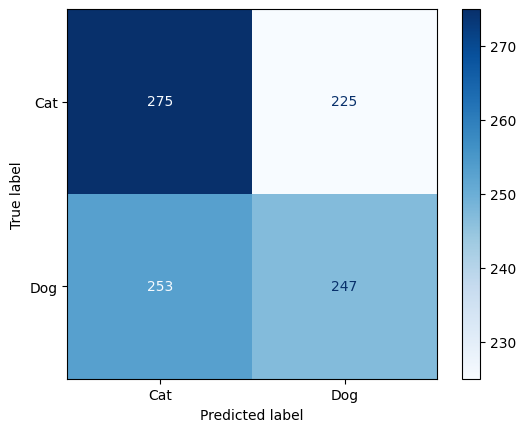

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels for the validation set
val_predictions = (model.predict(val_data) > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(val_data.classes, val_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [11]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(val_data.classes, val_predictions, target_names=class_names)
print(report)


              precision    recall  f1-score   support

         Cat       0.52      0.55      0.54       500
         Dog       0.52      0.49      0.51       500

    accuracy                           0.52      1000
   macro avg       0.52      0.52      0.52      1000
weighted avg       0.52      0.52      0.52      1000



I am trying to improve here!!!


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 224, 224, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 112, 112, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 56, 56, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,001,377 (103.00 MB)

 Trainable params: 26,997,921 (102.99 MB)

 Non-trainable params: 3,456 (13.50 KB)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 51s 676ms/step - AUC: 0.5094 - Precision: 0.4952 - Recall: 0.4885 - accuracy: 0.5171 - loss: 2.3785 - val_AUC: 0.5498 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 2.3839 - learning_rate: 1.0000e-04
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 637ms/step - AUC: 0.5942 - Precision: 0.5683 - Recall: 0.5609 - accuracy: 0.5639 - loss: 2.2491 - val_AUC: 0.5671 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 2.8598 - learning_rate: 1.0000e-04
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 648ms/step - AUC: 0.5949 - Precision: 0.6023 - Recall: 0.5629 - accuracy: 0.5739 - loss: 2.2627 - val_AUC: 0.5474 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 3.6409 - learning_rate: 1.0000e-04
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 637ms/step - AUC: 0.5916 - Precision: 0.5799 - Recall: 0.5727 - accuracy: 0.5816 - loss: 2.2256 - val_AUC: 0.5833 - val_P

50/50 ━━━━━━━━━━━━━━━━━━━━ 39s 791ms/step - AUC: 0.6320 - Precision: 0.5948 - Recall: 0.5660 - accuracy: 0.5859 - loss: 2.1563 - val_AUC: 0.6227 - val_Precision: 0.6429 - val_Recall: 0.0450 - val_accuracy: 0.5100 - val_loss: 2.2851 - learning_rate: 2.0000e-05
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - AUC: 0.6509 - Precision: 0.6279 - Recall: 0.5948 - accuracy: 0.6071 - loss: 2.1274

50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 683ms/step - AUC: 0.6508 - Precision: 0.6275 - Recall: 0.5950 - accuracy: 0.6071 - loss: 2.1275 - val_AUC: 0.5957 - val_Precision: 0.7500 - val_Recall: 0.0750 - val_accuracy: 0.5250 - val_loss: 2.2750 - learning_rate: 2.0000e-05
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - AUC: 0.6790 - Precision: 0.6348 - Recall: 0.6413 - accuracy: 0.6407 - loss: 2.0774

50/50 ━━━━━━━━━━━━━━━━━━━━ 37s 749ms/step - AUC: 0.6788 - Precision: 0.6349 - Recall: 0.6409 - accuracy: 0.6405 - loss: 2.0778 - val_AUC: 0.6151 - val_Precision: 0.7458 - val_Recall: 0.2200 - val_accuracy: 0.5725 - val_loss: 2.0976 - learning_rate: 2.0000e-05
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - AUC: 0.6787 - Precision: 0.6450 - Recall: 0.6606 - accuracy: 0.6459 - loss: 2.0594

50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 685ms/step - AUC: 0.6786 - Precision: 0.6448 - Recall: 0.6602 - accuracy: 0.6457 - loss: 2.0597 - val_AUC: 0.6080 - val_Precision: 0.6885 - val_Recall: 0.2100 - val_accuracy: 0.5575 - val_loss: 2.0778 - learning_rate: 2.0000e-05
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - AUC: 0.6502 - Precision: 0.5952 - Recall: 0.6053 - accuracy: 0.6102 - loss: 2.1001

50/50 ━━━━━━━━━━━━━━━━━━━━ 34s 675ms/step - AUC: 0.6503 - Precision: 0.5955 - Recall: 0.6055 - accuracy: 0.6101 - loss: 2.0997 - val_AUC: 0.6401 - val_Precision: 0.7361 - val_Recall: 0.2650 - val_accuracy: 0.5850 - val_loss: 2.0570 - learning_rate: 2.0000e-05
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - AUC: 0.6384 - Precision: 0.6105 - Recall: 0.5785 - accuracy: 0.5863 - loss: 2.1252

50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 665ms/step - AUC: 0.6386 - Precision: 0.6102 - Recall: 0.5787 - accuracy: 0.5865 - loss: 2.1250 - val_AUC: 0.6976 - val_Precision: 0.8514 - val_Recall: 0.3150 - val_accuracy: 0.6300 - val_loss: 2.0444 - learning_rate: 2.0000e-05
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 644ms/step - AUC: 0.6674 - Precision: 0.6340 - Recall: 0.6046 - accuracy: 0.6247 - loss: 2.0719 - val_AUC: 0.6567 - val_Precision: 0.7500 - val_Recall: 0.2700 - val_accuracy: 0.5900 - val_loss: 2.0857 - learning_rate: 2.0000e-05
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 644ms/step - AUC: 0.7126 - Precision: 0.6811 - Recall: 0.6352 - accuracy: 0.6644 - loss: 2.0077 - val_AUC: 0.6811 - val_Precision: 0.7679 - val_Recall: 0.2150 - val_accuracy: 0.5750 - val_loss: 2.1589 - learning_rate: 2.0000e-05
Epoch 16/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 635ms/step - AUC: 0.6600 - Precision: 0.6320 - Recall: 0.6064 - accuracy: 0.6176 - loss: 2.0826 - val_AUC: 0.7119 - val_Precision: 0.8750 - val_Recall: 0

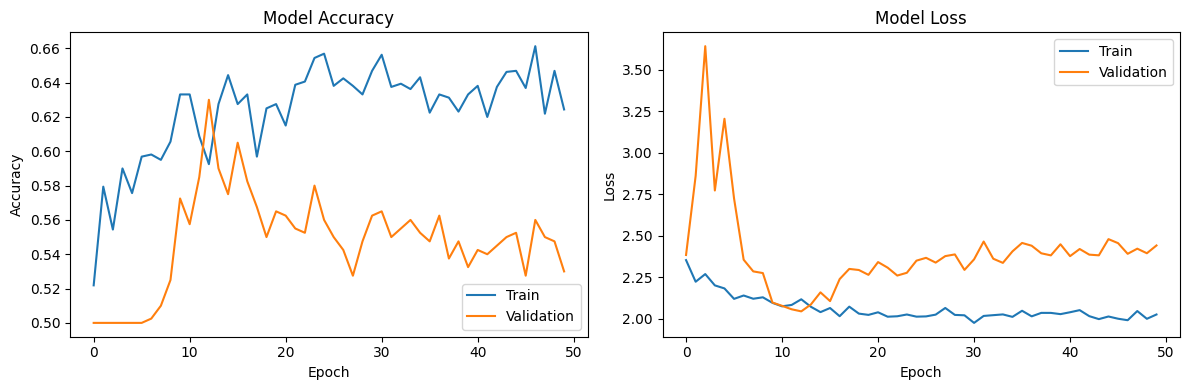

In [14]:
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Enhanced data augmentation for training
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.7, 1.3],
    channel_shift_range=0.2,
    validation_split=0.2  # Built-in validation split
)

# Only rescaling for validation
val_gen = ImageDataGenerator(rescale=1./255)

# Load data with increased image resolution
img_size = 224  # Increased from 150x150 to 224x224
batch_size = 32  # Increased batch size

train_data = train_gen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data = train_gen.flow_from_directory(
    train_dir,  # Using the same directory but with validation_split
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_data = val_gen.flow_from_directory(
    validation_dir,  # This will be used as our test set
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Don't shuffle test data
)

# Define improved model with more depth and better regularization
def build_improved_model(input_shape=(img_size, img_size, 3)):
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        # Third convolutional block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        # Fourth convolutional block
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Dropout(0.25),

        # Flatten and dense layers
        Flatten(),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    return model

# Create and compile model with better learning rate
model = build_improved_model()
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate for better convergence

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC', 'Precision', 'Recall']  # Additional metrics
)

# Print model summary
model.summary()

# Add callbacks for better training
# callbacks = [
  #   EarlyStopping(patience=50, restore_best_weights=True, monitor='val_loss'),
    # ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6, monitor='val_loss'),
   # ModelCheckpoint('best_cat_dog_model.h5', save_best_only=True, monitor='val_loss')


# Train with more epochs but using early stopping
history = model.fit(
    train_data,
    epochs=50,  # More epochs, but we'll use early stopping
    validation_data=val_data,
    callbacks=callbacks
)

# Evaluate on test data
test_results = model.evaluate(test_data)
print(f"Test accuracy: {test_results[1]:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('training_history.png')
plt.show()